# <center> <font color = "red"> Projeto 2 - Teste A/B com Portfólio </font></center>
### <center>  Martim José e Filipe Borba</center>

In [30]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.patches as mpatches
import math

In [31]:
arquivo = open("borbamartim-export2.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [32]:
# Convertendo para um dataframe
lista_dicionarios = []

for k,v in dados_fire["borbamartim-cd-351f6"].items():
    lista_dicionarios.append(v)
    
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [33]:
# Convertendo para um DataFrame de delta_t
agrupado = dataframe.groupby(by=["user_id", "versao"])
users = set(dataframe.user_id) # We convert it to a set so that each user appear only once
users = list(users) 

In [34]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})

In [35]:
grupo1.sort_values(by="tempo")
dataframe_resumo = pd.DataFrame.from_records(resultados)
dataframe_resumo.delta_t/=1000 # Convertendo milissegundos em segundos

## <font color='blue'>1) Introdução </font>

Um teste A/B é realizado com o intuito de verificar a eficiência de duas versões de um produto. No caso, estamos utilizando um portfólio. É muito útil para obter dados sobre qual abordagem, design, escrita, etc. pode ser mais convidativa ao usuário, facilitando sua utilização e melhorando as experiências do próprio usuário com o produto.

Para realizarmos este teste A/B, criamos duas interfaces diferentes para um portfólio de projetos. Na versão A, temos o site ordenado por: Início, Sobre Mim, Projetos e Contato. Já na versão B, o site foi tirado da ordem, sendo organizado por: Início, Projetos, Sobre Mim e Contato.

A tarefa incubida ao usuário, foi a de achar o Artigo "Técnicas de Primitivação", da matéria, Matemática da Variação, e ao achar, clicar no botão "Achei", determinando o fim da iteração. O que será usado para análise, será o tempo que o usuário levou, desde o carregamento da página até clicar no botão "Achei", na página do projeto.

Com isso, poderemos dizer qual versão é a ideal para o usuário achar mais facilmente o projeto em questão. Quanto menor o tempo gasto nessa tarefa, mais otimizado o site é para mostrar o verdadeiro conteúdo do portfólio, os projetos.

<img src=teste-ab.png width=900>

## <font color='blue'>2) Análise</font>

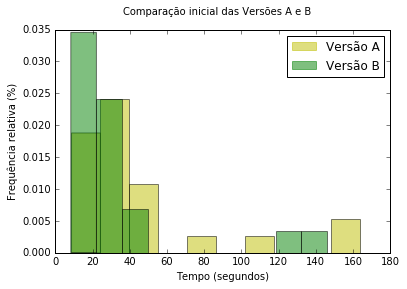

In [36]:
tempos_A = list(dataframe_resumo[dataframe_resumo.versao=="A"].delta_t)
tempos_B = list(dataframe_resumo[dataframe_resumo.versao=="B"].delta_t)
plt.hist(tempos_A, bins=10, color = "y", alpha=0.5, normed = 1)
plt.hist(tempos_B, bins=10, color = "g", alpha=0.5, normed = 1)

plt.ylabel("Frequência relativa (%)")
plt.xlabel("Tempo (segundos)")

legendaA = mpatches.Patch(color='y', alpha = 0.5,  label='Versão A')
legendaB = mpatches.Patch(color='g', alpha = 0.5, label='Versão B')
plt.legend(handles=[legendaA, legendaB])
plt.suptitle("Comparação inicial das Versões A e B")

Acima, temos os dados coletados no Firebase inicialmente, divididos entre as versões A e B do site.

In [37]:
nA = len(tempos_A)
nB = len(tempos_B)
print("Número de amostras da versão A:", nA)
print("Número de amostras da versão B:", nB)

Número de amostras da versão A: 24
Número de amostras da versão B: 21


In [38]:
n = nA
escolhaA = []
for i in range(10000):
    escolhaA.append(np.mean(np.random.choice(tempos_A,size=n)))

print("Média Amostral de A para n=10 (X̅):", np.mean(escolhaA))
print("Desvio Padrão Amostral de A para n=10:", np.std(escolhaA))
print("Média Real da população A:", np.mean(tempos_A))
print("Desvio Padrão Real da população A:", np.std(tempos_A))

Média Amostral de A para n=10 (X̅): 46.3201741542
Desvio Padrão Amostral de A para n=10: 8.38611962548
Média Real da população A: 46.4580833333
Desvio Padrão Real da população A: 41.1651510138


In [39]:
n = nB
escolhaB = []
for i in range(10000):
    escolhaB.append(np.mean(np.random.choice(tempos_B,size=n)))

print("Média Amostral de B para n=10 (X̅):", np.mean(escolhaB))
print("Desvio Padrão Amostral de B para n=10:", np.std(escolhaB))
print("Média Real da população B:", np.mean(tempos_B))
print("Desvio Padrão Real da população B:", np.std(tempos_B))

Média Amostral de B para n=10 (X̅): 32.8405533
Desvio Padrão Amostral de B para n=10: 7.26717179576
Média Real da população B: 32.7948095238
Desvio Padrão Real da população B: 33.811100121


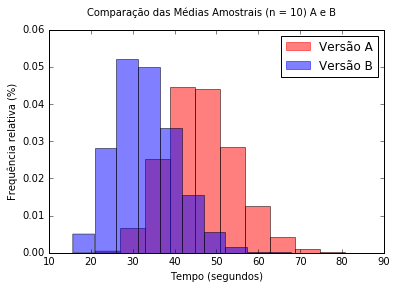

In [40]:
histmediaamostralA = plt.hist(escolhaA, bins = 10, normed = 1, color="r", alpha = 0.5)
histmediaamostralB = plt.hist(escolhaB, bins = 10, normed = 1, color="b", alpha = 0.5)
plt.ylabel("Frequência relativa (%)")
plt.xlabel("Tempo (segundos)")

legendaA = mpatches.Patch(color='r', alpha = 0.5,  label='Versão A')
legendaB = mpatches.Patch(color='b', alpha = 0.5, label='Versão B')
plt.legend(handles=[legendaA, legendaB])
plt.suptitle("Comparação das Médias Amostrais (n = 10) A e B")

Faremos uma comparação de duas médias, que, no caso, são <b>independentes</b> e com distribuição conhecida, por se tratar de um Teste A/B, assim como no exemplo 9.2 da página 310 do livro do Magalhães. Para isso, precisamos saber se as variâncias das duas amostras são diferentes ou não. 

Portanto, vamos realizar um teste de hipóteses F, visto que iremos comparar a variância de duas amostras diferentes.
<li><b>H0:</b> VarA = VarB (a variância da versão A será igual à variância da versão B) -> <u>Hipótese Nula</u>; </li>
<li><b>Ha:</b> VarA ≠ VarB (a variância da versão A será diferente da variância da versão B) -> <u>Hipótese Alternativa</u>; </li>

Para realizar o teste F, vamos levar em conta um <b>nível de significância de 5%.</b>

In [41]:
vA = nA - 1
vB = nB - 1
print("Graus de liberdade A:",vA)
print("Graus de liberdade B:",vB)

signif = 0.05
print("Nível de Significância:", signif*100, "%")

valor_max_f = stats.f.ppf(signif,vA,vB)
print("Ponto crítico:",valor_max_f)
print()

Graus de liberdade A: 23
Graus de liberdade B: 20
Nível de Significância: 5.0 %
Ponto crítico: 0.488367561607



In [42]:
f_obs= np.var(tempos_A)/np.var(tempos_B)
print('F observado:',f_obs)

F observado: 1.48231608883


Visto que o F observado é maior que o ponto crítico, podemos rejeitar a hipótese nula, de que as variâncias são iguais. Portanto, a partir de agora temos duas médias amostrais independentes e duas <b>variâncias diferentes e independentes</b>.

O teste a ser realizado será o teste de hipóteses de <b>t-Student</b>, visto que temos poucas amostras para a inferência com um teste Z. <br>

<li><b>H0:</b> µa = µb (a média de tempo da versão A será igual à média de tempo da versão B) -> <u>Hipótese Nula</u>; </li>
<li><b>Ha:</b> µa > µb (a média de tempo da versão A será maior do que a média de tempo da versão B) -> <u>Hipótese Alternativa</u>; </li>

<img src="eq1.png" width=200, align="left">
Usaremos a equação abaixo para calcular T. 
<br>Note que em nossa hipótese nula, as médias devem ser iguais.

Esta outra equação calcula o grau de liberdade.
<img src="eq2.png" width=200, align="left">

Para realizar o teste t-Student, vamos levar em conta uma <b>nível de significância de 5%.</b>

In [43]:
v = (((((np.var(escolhaA)**2)/nA) + ((np.var(escolhaB)**2)/nB))**2) / (((((np.var(escolhaA)**2)/nA)**2)/(nA-1)) + ((((np.var(escolhaB)**2)/nB)**2)/(nB-1))))-1
print("Graus de liberdade:",v)
signif = 0.05
print("Nível de Significância:", signif*100, "%")

Graus de liberdade: 41.0931283751
Nível de Significância: 5.0 %


In [44]:
pc = -stats.t.ppf(signif,v)
print("Ponto crítico:",pc)

Ponto crítico: 1.68278985088


Olhando na tabela de distribuição T-Student, este resultado de ponto crítico é confirmado. Aproximando o grau de liberdade para <u>40</u> e cruzando com o nível de significância <u>0.05</u>, temos <b>1,684</b>.

In [45]:
varA = np.var(tempos_A)
varB = np.var(tempos_B)
D = np.mean(escolhaA) - np.mean(escolhaB)
T = D/(math.sqrt(varA/nA + varB/nB))
print("T observado:",T)

T observado: 1.20543837293


Visto que T_observado é menor que T_crítico para um Nível de Significância (Alfa) de 5%, então, <b>a hipótese nula não deve ser rejeitada</b>, uma vez que a probabilidade de µa ≠ µb para esse Intervalo de Confiança (95%) é muito pequena. Portanto, pode-se concluir que, depois do teste feito, a diferença entre as interfaces não é relevante o bastante para se julgar que uma é mais eficiente que a outra. Para melhorar o site do portfólio futuramente, um outro teste A/B deveria ser feito, a fim de se realizar a técnica de inferência estatística novamente e concluir que uma versão realmente é melhor que a outra.